In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.txt',header=None,sep=';',names=["Text", "Emotion"], encoding="utf-8")


In [3]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df.shape

(16000, 2)

In [5]:
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     16000 non-null  object
 1   Emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [8]:
df["Emotion"].value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

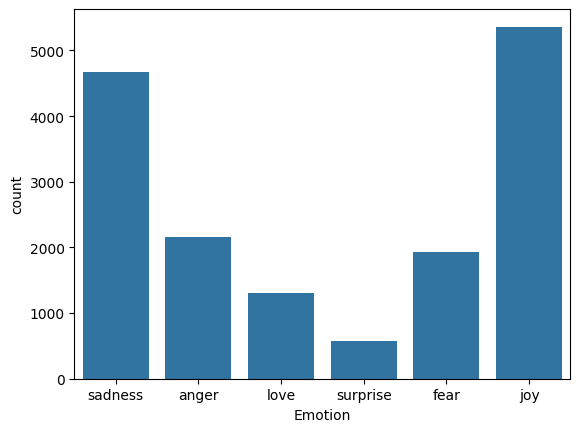

In [9]:
sns.countplot(x = df['Emotion'])
plt.show()

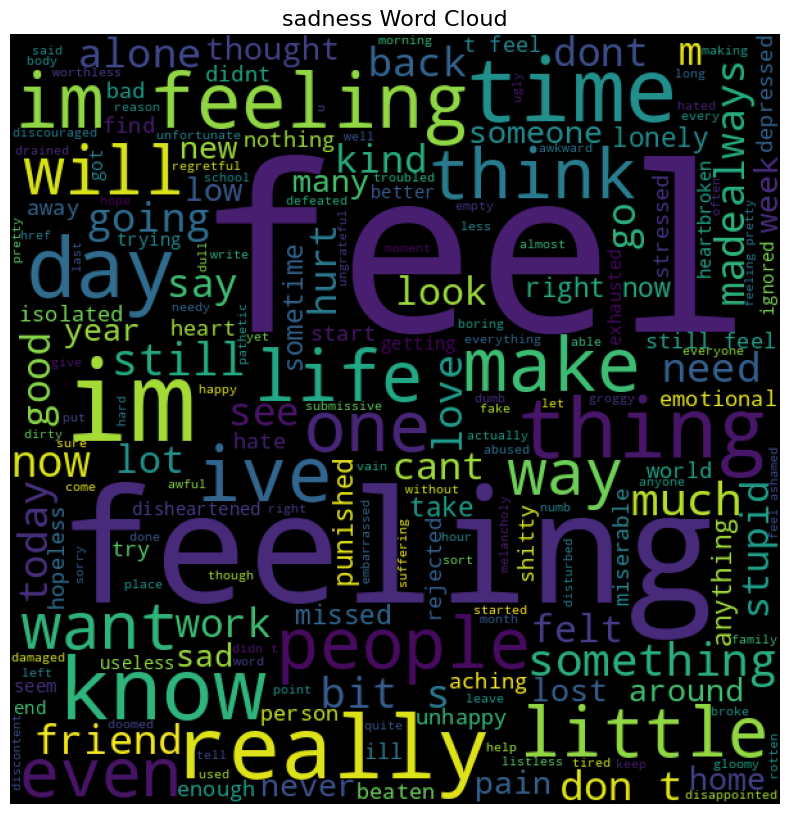

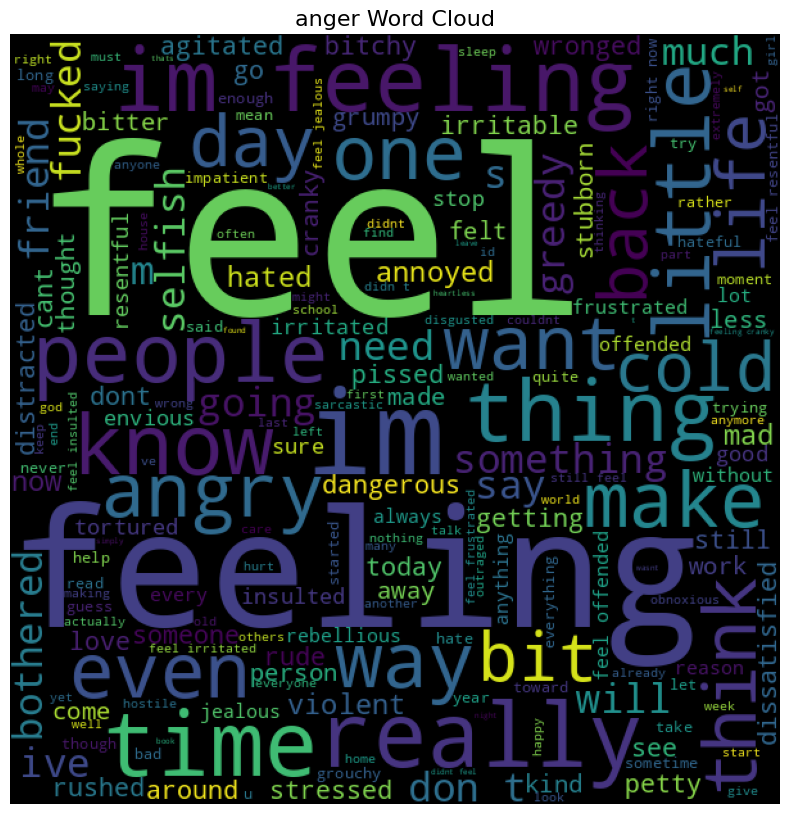

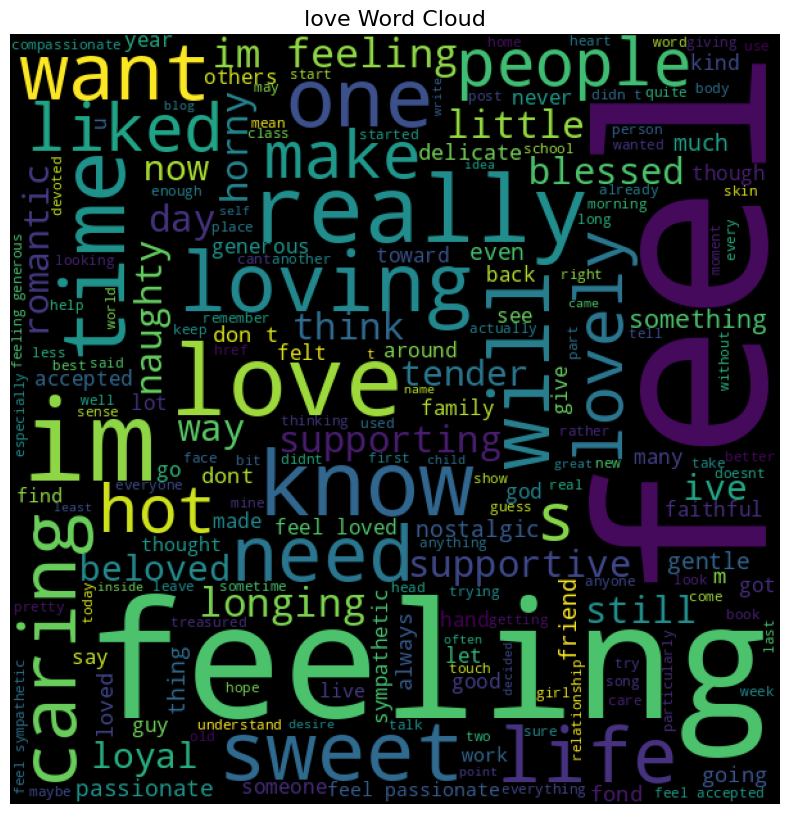

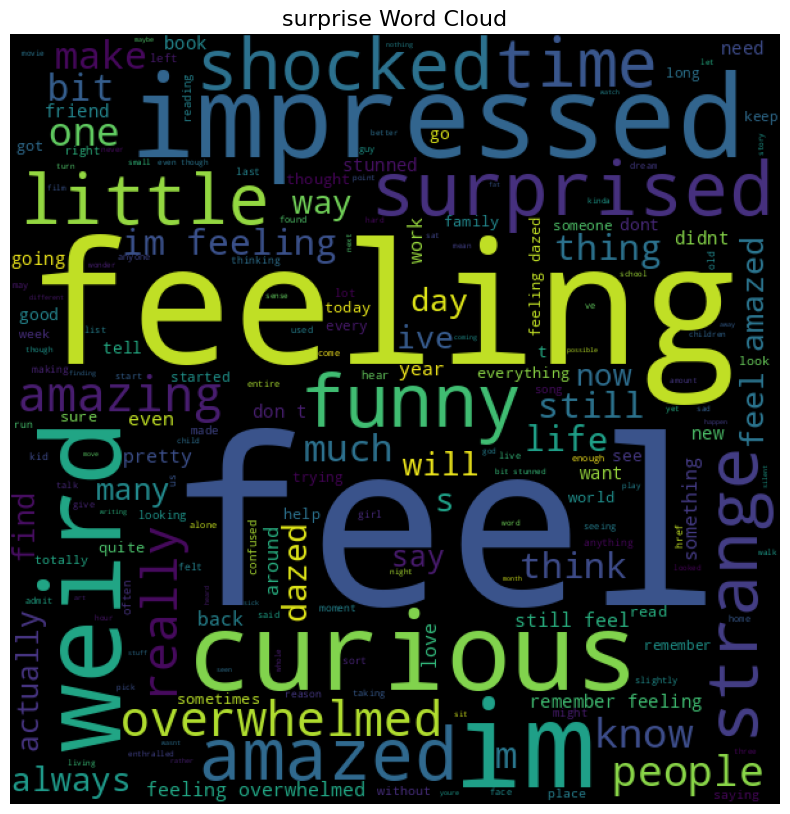

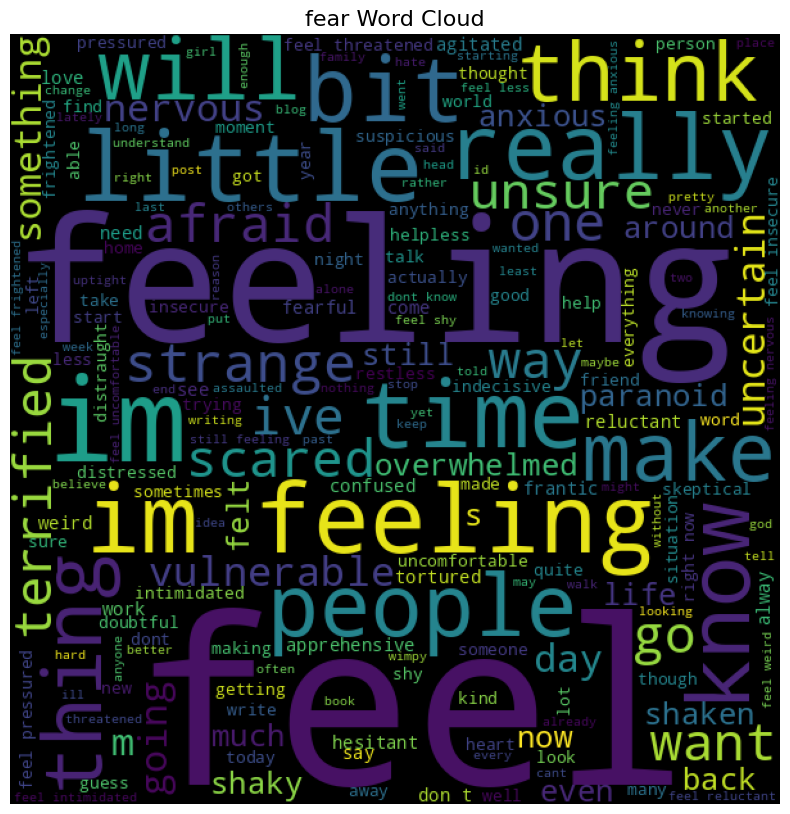

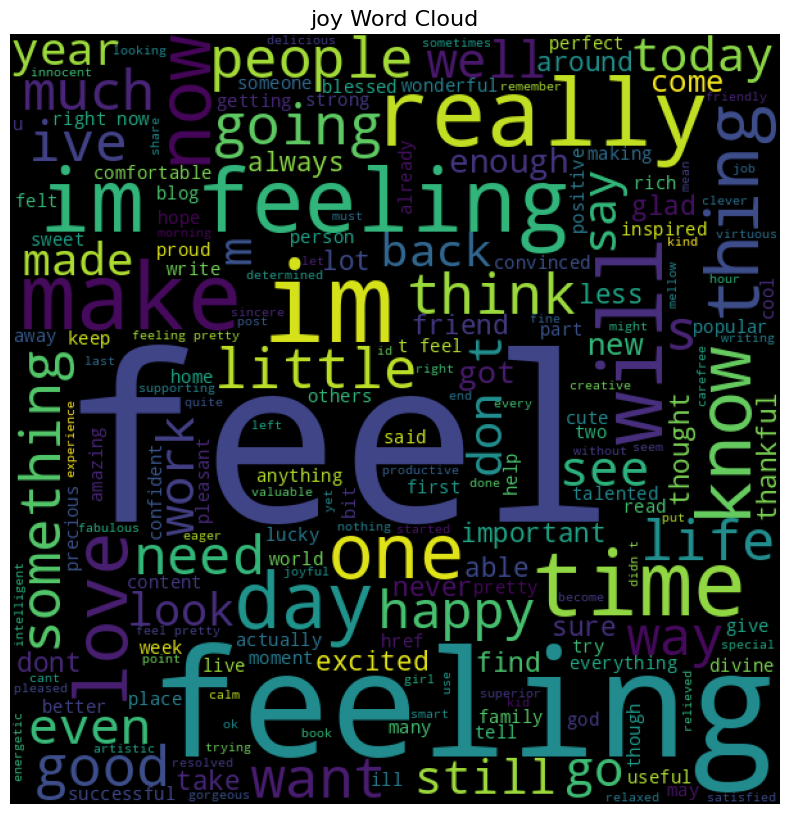

In [10]:
from wordcloud import WordCloud

def words_cloud(wordcloud, emotion):
    plt.figure(figsize=(10, 10))
    plt.title(emotion+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    plt.axis("off");
    
emotions_list = df['Emotion'].unique()
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in df.loc[df['Emotion'] == emotion,'Text']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

In [11]:
df2 = df.copy()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report

In [13]:
import nltk
import re
from nltk import PorterStemmer


nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)
    

    

[nltk_data] Downloading package stopwords to /home/shohel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df['clean_text'] = df['Text'].apply(clean_text)

In [15]:
df3 = df.copy()

In [16]:
df.head(2)

,Text,Emotion,clean_text
0,i didnt feel humiliated,sadness,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,go feel hopeless damn hope around someon care ...


In [17]:
y = df['Emotion']

In [18]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(df['clean_text'],y,test_size=0.2,random_state=42)

In [20]:
x_train.shape

(12800,)

In [21]:
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train).toarray()
x_test_tfidf = tfidf.transform(x_test).toarray()

In [22]:
x_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##  Apply logistic regression algorithm

In [23]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(x_train_tfidf,y_train)

LogisticRegression()

In [24]:
y_pred = logistic.predict(x_test_tfidf)
print(accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.829375
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       427
           1       0.84      0.73      0.78       397
           2       0.78      0.94      0.85      1021
           3       0.80      0.49      0.61       296
           4       0.88      0.92      0.90       946
           5       0.77      0.45      0.57       113

    accuracy                           0.83      3200
   macro avg       0.82      0.72      0.76      3200
weighted avg       0.83      0.83      0.82      3200



In [25]:
def predicttion(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorized = tfidf.transform([cleaned_text])

    predict = logistic.predict(input_vectorized)
    predict = encoder.inverse_transform(predict)
    label =  np.max(logistic.predict(input_vectorized))

    return predict,label



In [26]:
sentences = [
            "i didnt feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
            ]
for sentence in sentences:
    print(sentence)
    pred_emotion, label = predicttion(sentence)
    print("Prediction :",pred_emotion[0])
    print("Label :",label)
    print("================================================================")

i didnt feel humiliated
Prediction : sadness
Label : 4
i feel strong and good overall
Prediction : joy
Label : 2
im grabbing a minute to post i feel greedy wrong
Prediction : anger
Label : 0
He was speechles when he found out he was accepted to this new job
Prediction : joy
Label : 2
This is outrageous, how can you talk like that?
Prediction : anger
Label : 0
I feel like im all alone in this world
Prediction : sadness
Label : 4
He is really sweet and caring
Prediction : love
Label : 3
You made me very crazy
Prediction : sadness
Label : 4
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
Prediction : love
Label : 3
i am feeling grouchy
Prediction : anger
Label : 0
He hates you
Prediction : anger
Label : 0


In [27]:
import pickle
pickle.dump(logistic,open("logistic_regresion.pkl",'wb'))
pickle.dump(encoder,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf,open("tfidf.pkl",'wb'))


## Apply GaussianNB algorithm

0.295
              precision    recall  f1-score   support

           0       0.26      0.30      0.28       427
           1       0.27      0.38      0.31       397
           2       0.52      0.29      0.37      1021
           3       0.15      0.30      0.20       296
           4       0.45      0.26      0.33       946
           5       0.07      0.27      0.11       113

    accuracy                           0.29      3200
   macro avg       0.29      0.30      0.27      3200
weighted avg       0.38      0.29      0.32      3200



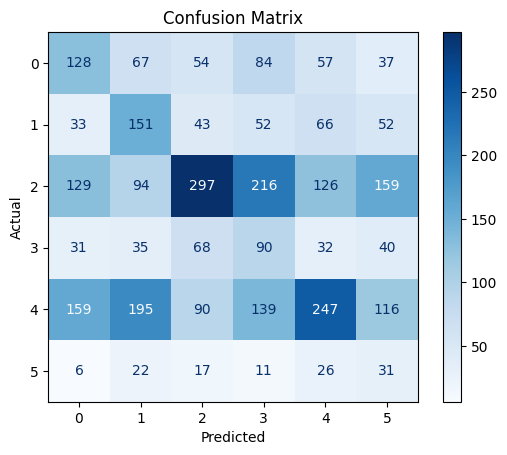

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

naive = GaussianNB()

naive.fit(x_train_tfidf,y_train)

y_pred = naive.predict(x_test_tfidf)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred,labels=naive.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Using Deep Learning Algorithm

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU,Embedding